## **CognoRise Infotech Data Analysis Internship Task 1**

## **Unemployment In India**

In [3]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import dataset
df = pd.read_csv("Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
# Statistical Description of data
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [7]:
# Shape of data
df.shape

(768, 7)

In [8]:
# Checking for null values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [9]:
# Remove null values
data = df.dropna()

In [10]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [11]:
# Checking for Duplicated data
data.duplicated().sum()

0

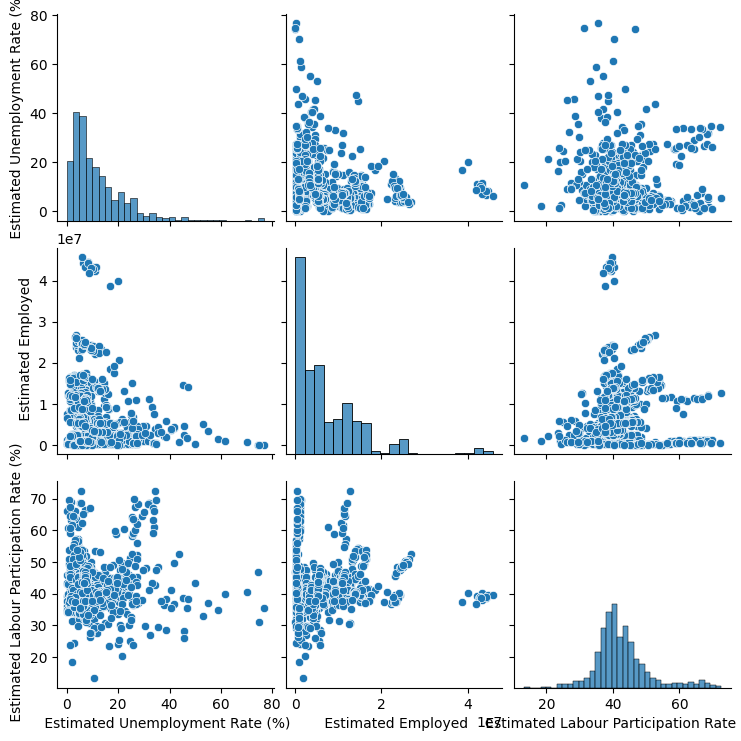

In [12]:
sns.pairplot(data)

In [13]:
data['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [14]:
data['Area'].unique()

array(['Rural', 'Urban'], dtype=object)

In [15]:
# Remove trailing spaces
data.rename(columns=lambda x: x.strip(), inplace=True)

In [16]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [17]:
# Create a new column "Year" extract from Date Column

# data['year'], data['month'] = data[' Date'].dt.year, df['Date'].dt.month

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [18]:
data.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'Year', 'Month'],
      dtype='object')

In [19]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019,9


In [20]:
data['Frequency'].unique()

array([' Monthly', 'Monthly'], dtype=object)

In [21]:
data['Frequency'].replace(' Monthly', 'Monthly', inplace=True )

In [22]:
data['Frequency'].unique()

array(['Monthly'], dtype=object)

In [23]:
# Rename column name
data.rename(columns={'Estimated Unemployment Rate (%)':'Unemployment Rate'}, inplace=True)

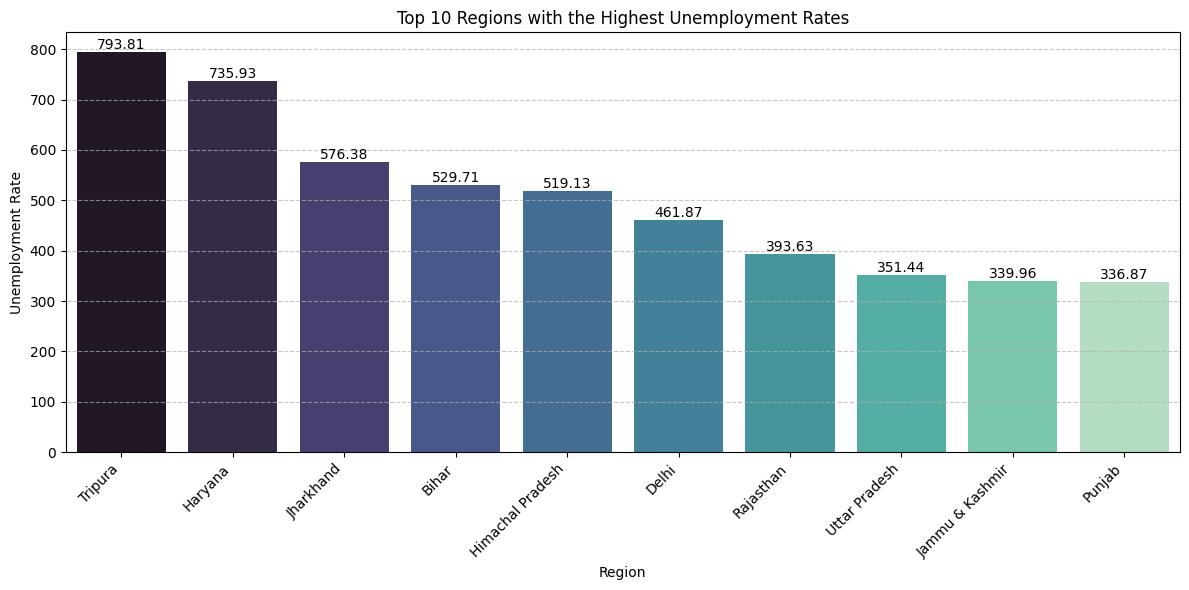

In [24]:
# Top 10 Regions with the highest unemployment rate

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
top10RegionUnemploymentData = data.groupby('Region')["Unemployment Rate"].sum().nlargest(10).sort_values(ascending=False)
top10RegionUnemployment = sns.barplot(x=top10RegionUnemploymentData.index, y=top10RegionUnemploymentData.values, palette="mako")

for bars in top10RegionUnemployment.containers:
    top10RegionUnemployment.bar_label(bars)

plt.title('Top 10 Regions with the Highest Unemployment Rates')
plt.xlabel("Region")
plt.ylabel("Unemployment Rate")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


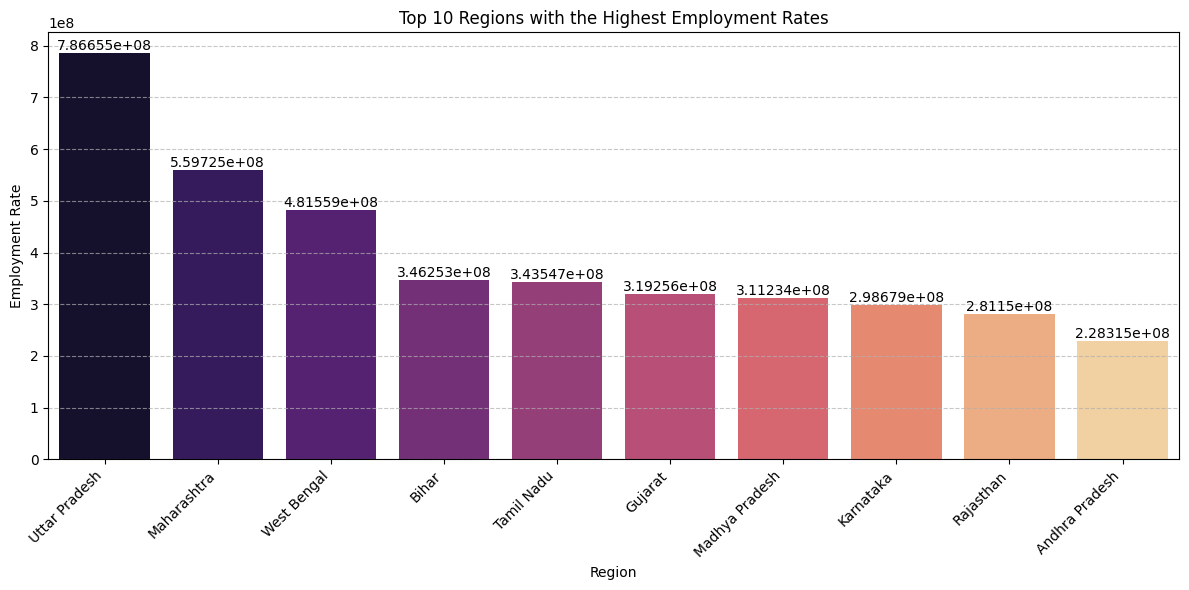

In [25]:
# Top 10 Regions with the highest employment rate

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
top10RegionemploymentData = data.groupby('Region')["Estimated Employed"].sum().nlargest(10).sort_values(ascending=False)
top10Regionemployment = sns.barplot(x=top10RegionemploymentData.index, y=top10RegionemploymentData.values, palette="magma")

for bars in top10Regionemployment.containers:
    top10Regionemployment.bar_label(bars)

plt.title('Top 10 Regions with the Highest Employment Rates')
plt.xlabel("Region")
plt.ylabel("Employment Rate")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


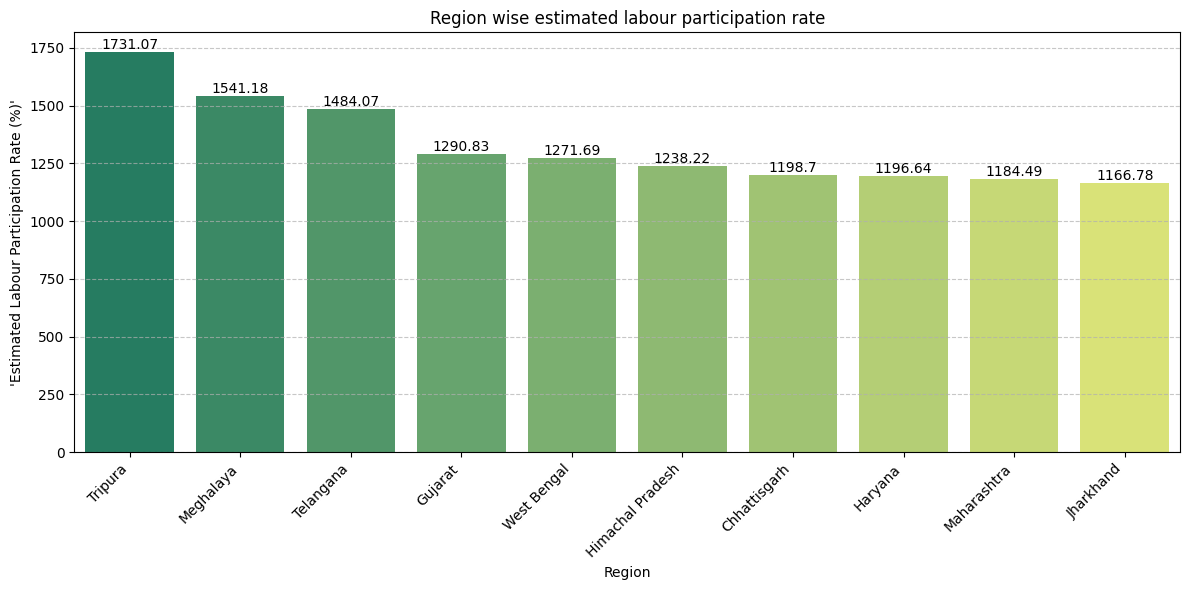

In [26]:
# Region wise estimated labour participation rate

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
top10EstimatedLabourParticipatonRate = data.groupby('Region')['Estimated Labour Participation Rate (%)'].sum().nlargest(10).sort_values(ascending=False)
top10EstimatedLabourParticipatonRate = sns.barplot(x=top10EstimatedLabourParticipatonRate.index, y=top10EstimatedLabourParticipatonRate.values, palette="summer")

for bars in top10EstimatedLabourParticipatonRate.containers:
    top10EstimatedLabourParticipatonRate.bar_label(bars)

plt.title('Region wise estimated labour participation rate')
plt.xlabel("Region")
plt.ylabel("'Estimated Labour Participation Rate (%)'")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [27]:
data.groupby('Region')['Estimated Labour Participation Rate (%)'].sum().sort_values(ascending=False)

Region
Tripura             1731.07
Meghalaya           1541.18
Telangana           1484.07
Gujarat             1290.83
West Bengal         1271.69
Himachal Pradesh    1238.22
Chhattisgarh        1198.70
Haryana             1196.64
Maharashtra         1184.49
Jharkhand           1166.78
Assam               1166.58
Karnataka           1157.67
Punjab              1151.87
Tamil Nadu          1144.42
Rajasthan           1119.25
Uttar Pradesh       1104.11
Andhra Pradesh      1102.52
Delhi               1090.03
Odisha              1089.94
Madhya Pradesh      1087.00
Bihar               1068.31
Puducherry          1013.81
Kerala               976.30
Goa                  941.99
Uttarakhand          911.94
Jammu & Kashmir      861.65
Sikkim               783.19
Chandigarh           472.04
Name: Estimated Labour Participation Rate (%), dtype: float64

In [28]:
data.groupby('Area')['Unemployment Rate'].sum()

Area
Rural    3706.60
Urban    5016.48
Name: Unemployment Rate, dtype: float64

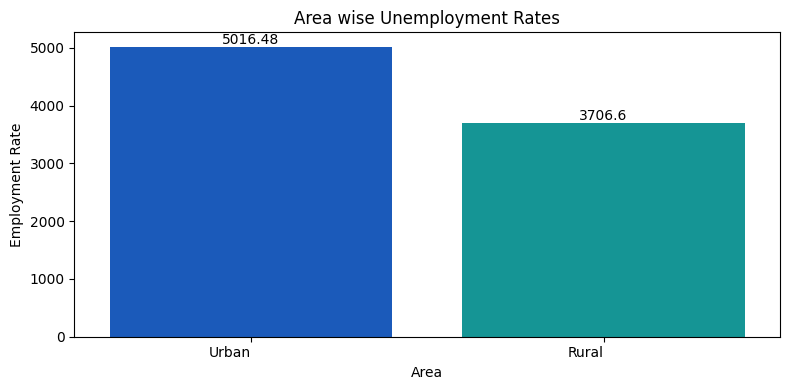

In [29]:
# Area wise Unemployment Rate

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
AreaWiseUnemploymentRate = data.groupby('Area')["Unemployment Rate"].sum().nlargest(10).sort_values(ascending=False)
AreaWiseUnemploymentRate  = sns.barplot(x=AreaWiseUnemploymentRate .index, y=AreaWiseUnemploymentRate .values, palette="winter")

for bars in AreaWiseUnemploymentRate .containers:
    AreaWiseUnemploymentRate .bar_label(bars)

plt.title('Area wise Unemployment Rates')
plt.xlabel("Area")
plt.ylabel("Employment Rate")
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


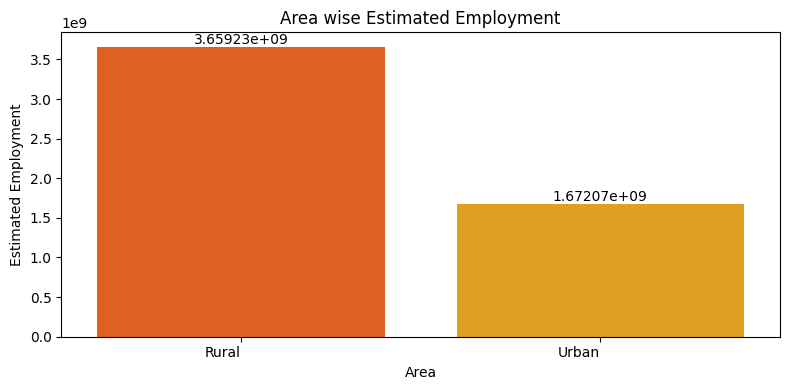

In [30]:
# Area wise Estimated Employment

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
AreaWiseEstimatedEmployment = data.groupby('Area')["Estimated Employed"].sum().nlargest(10).sort_values(ascending=False)
AreaWiseEstimatedEmployment  = sns.barplot(x=AreaWiseEstimatedEmployment .index, y=AreaWiseEstimatedEmployment.values, palette="autumn")

for bars in AreaWiseEstimatedEmployment.containers:
    AreaWiseEstimatedEmployment.bar_label(bars)

plt.title('Area wise Estimated Employment')
plt.xlabel("Area")
plt.ylabel("Estimated Employment")
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


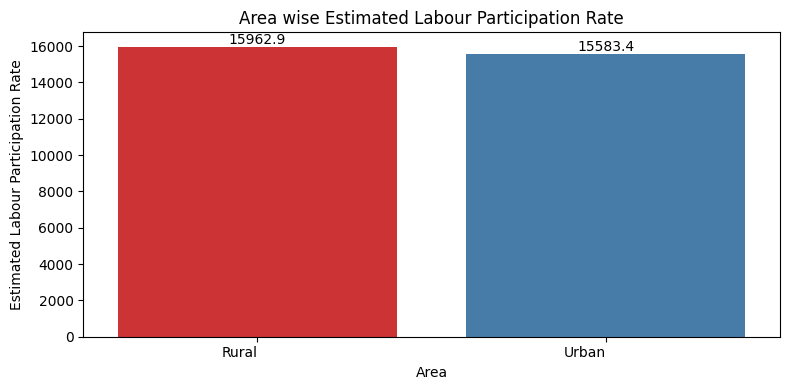

In [31]:
# Area wise Estimated Labour Participation Rate

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
AreaWiseEstimatedLabourParticipationRate = data.groupby('Area')['Estimated Labour Participation Rate (%)'].sum().nlargest(10).sort_values(ascending=False)
AreaWiseEstimatedLabourParticipationRate  = sns.barplot(x=AreaWiseEstimatedLabourParticipationRate.index, y=AreaWiseEstimatedLabourParticipationRate.values, palette="Set1")

for bars in AreaWiseEstimatedLabourParticipationRate.containers:
    AreaWiseEstimatedLabourParticipationRate.bar_label(bars)

plt.title('Area wise Estimated Labour Participation Rate')
plt.xlabel("Area")
plt.ylabel("Estimated Labour Participation Rate")
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


In [32]:
# Calculate the average estimated unemployment rate
average_unemployment_rate = data['Unemployment Rate'].mean()
average_unemployment_rate

11.787945945945946

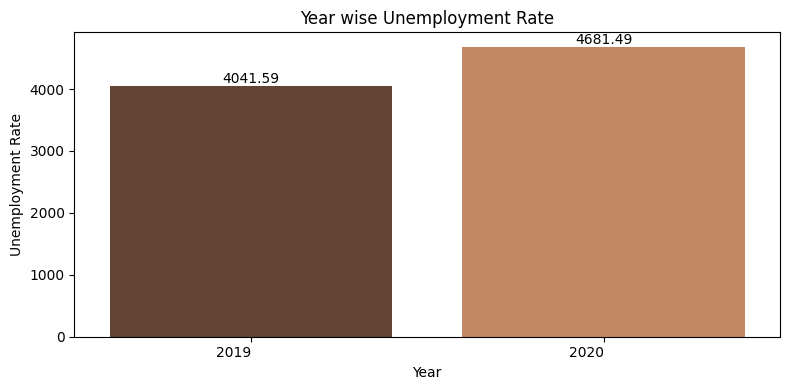

In [33]:
# Year wise Unemployment Rate

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
yearwiseUnemploymentRate = data.groupby('Year')["Unemployment Rate"].sum().nlargest(10).sort_values(ascending=False)
yearwiseUnemploymentRate  = sns.barplot(x=yearwiseUnemploymentRate.index, y=yearwiseUnemploymentRate.values, palette="copper")

for bars in yearwiseUnemploymentRate.containers:
    yearwiseUnemploymentRate.bar_label(bars)

plt.title('Year wise Unemployment Rate')
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


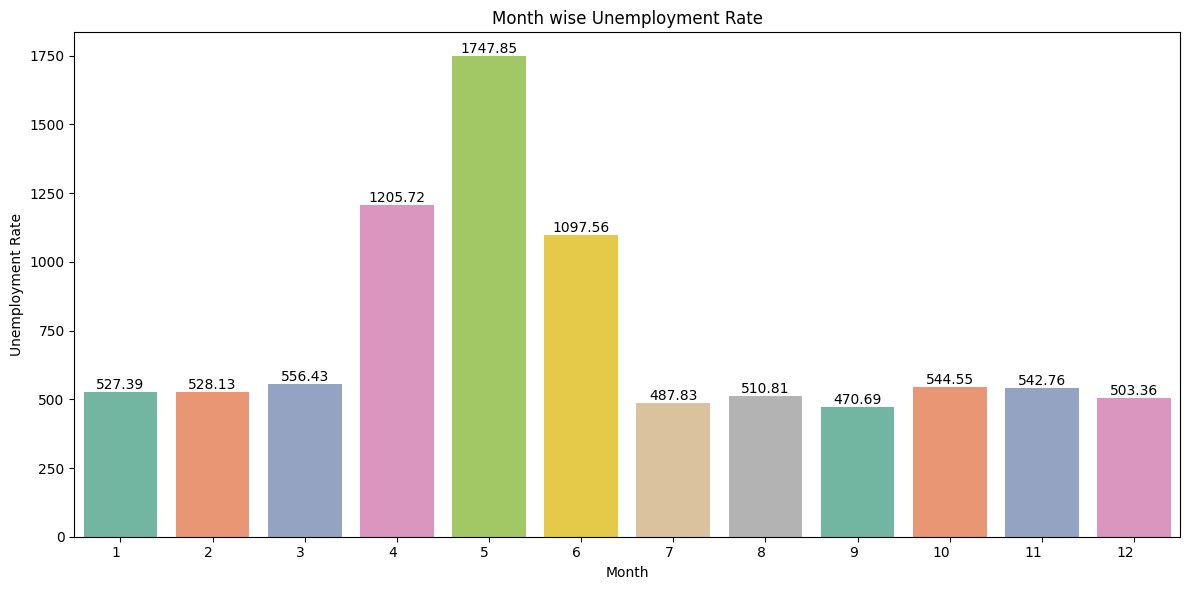

In [34]:
# Month wise Unemployment Rate

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
MonthwiseUnemploymentRate = data.groupby('Month')["Unemployment Rate"].sum().nlargest(12).sort_values(ascending=False)
MonthwiseUnemploymentRate  = sns.barplot(x=MonthwiseUnemploymentRate.index, y=MonthwiseUnemploymentRate.values, palette="Set2")
for bars in MonthwiseUnemploymentRate.containers:
    MonthwiseUnemploymentRate.bar_label(bars)
plt.title('Month wise Unemployment Rate')
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


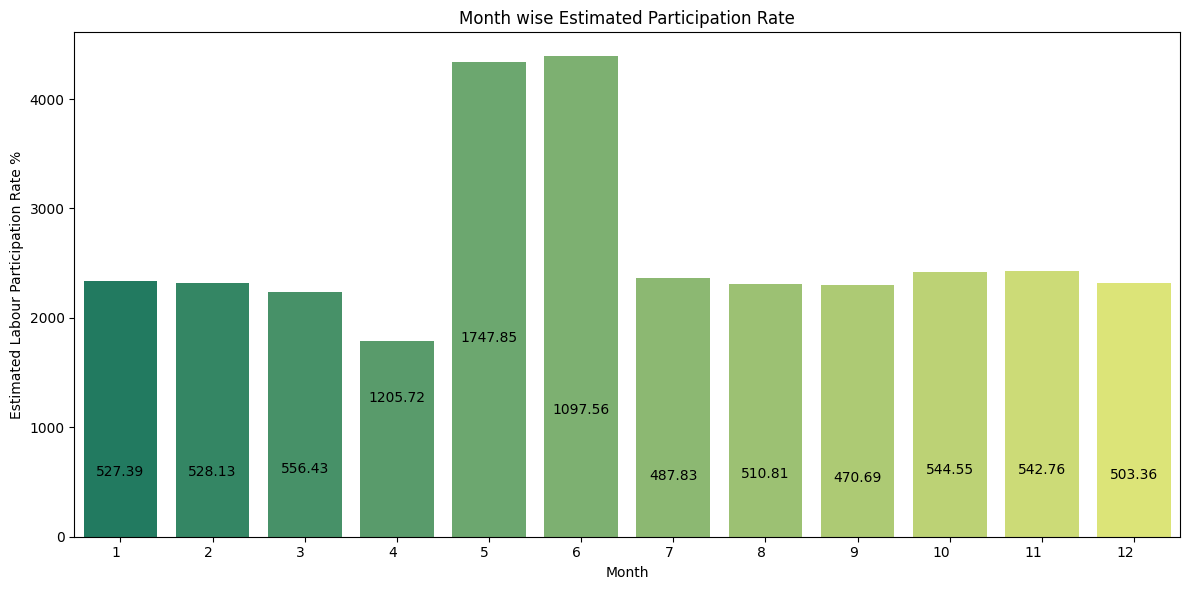

In [35]:
# Month wise Estimated Labour Participation Rate

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
MonthwiseEstimatedLabourParticipationRate = data.groupby('Month')["Estimated Labour Participation Rate (%)"].sum().nlargest(12).sort_values(ascending=False)
MonthwiseEstimatedLabourParticipationRate  = sns.barplot(x=MonthwiseEstimatedLabourParticipationRate.index, y=MonthwiseEstimatedLabourParticipationRate.values, palette="summer")
for bars in MonthwiseUnemploymentRate.containers:
   MonthwiseEstimatedLabourParticipationRate.bar_label(bars)
plt.title('Month wise Estimated Participation Rate')
plt.xlabel("Month")
plt.ylabel("Estimated Labour Participation Rate %")
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


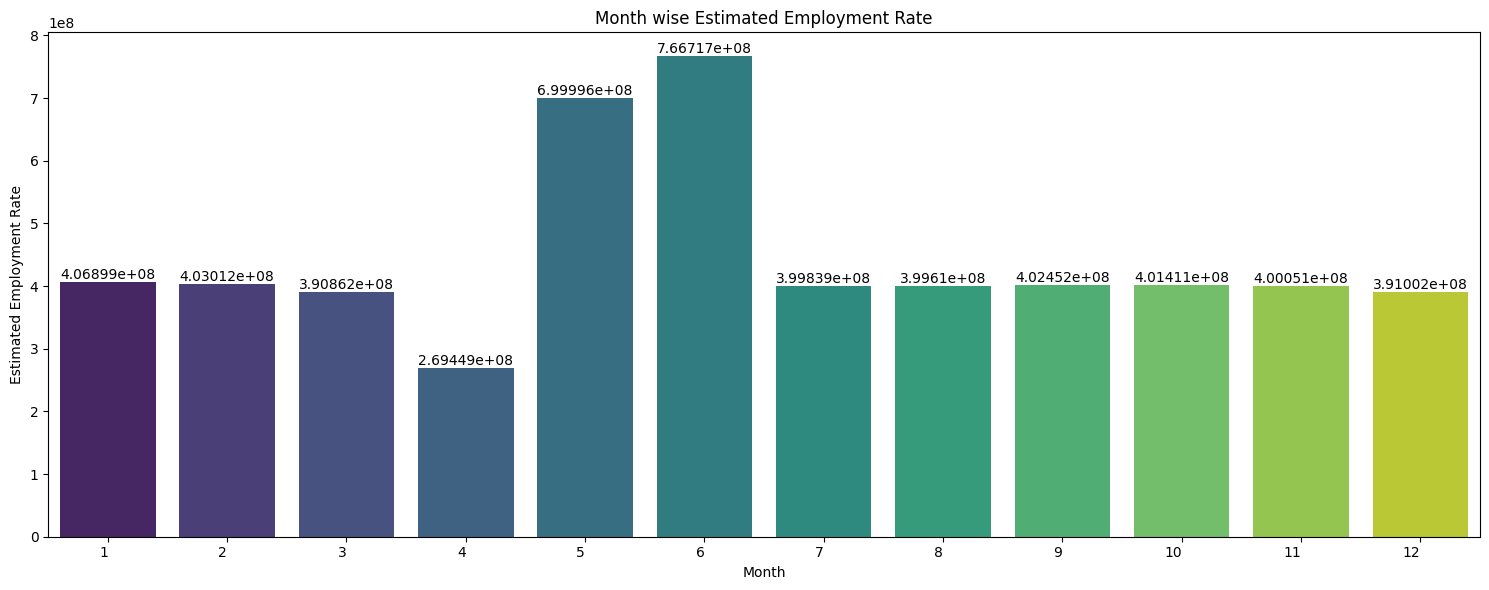

In [36]:
# Month wise Estimated Employment Rate

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
MonthwiseEstimatedEmploymentRate = data.groupby('Month')["Estimated Employed"].sum().nlargest(12).sort_values(ascending=False)
MonthwiseEstimatedEmploymentRate  = sns.barplot(x=MonthwiseEstimatedEmploymentRate.index, y=MonthwiseEstimatedEmploymentRate.values, palette="viridis")
for bars in MonthwiseEstimatedEmploymentRate.containers:
   MonthwiseEstimatedEmploymentRate.bar_label(bars)
plt.title('Month wise Estimated Employment Rate')
plt.xlabel("Month")
plt.ylabel("Estimated Employment Rate")
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()